<a href="https://colab.research.google.com/github/fernando-marconi/Projeto-Pipeline-Combustivel/blob/main/Projeto_Pre%C3%A7os_Combustiveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto | Modelagem de dados**

In [1]:
# Frameworks
import pandas as pd
import numpy as np
import duckdb
import os

from datetime import datetime

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Local do diretorio
diretorio = '/content/drive/MyDrive/Projeto_combustivel/Bronze/'
arquivos = os.listdir(diretorio)
arquivos

['ca-2021-02.csv',
 'ca-2020-01.csv',
 'ca-2021-01.csv',
 'ca-2020-02.csv',
 'ca-2022-01.csv',
 'ca-2022-02.csv',
 'ca-2023-01.csv',
 'ca-2023-02.csv',
 'ca-2024-01.csv',
 'ca-2024-02.csv',
 'ca-2025-01.csv']

In [6]:
# Criar o banco de dados
local_db = '/content/drive/MyDrive/Projeto_combustivel/Prata/'
conexao_banco = duckdb.connect( local_db + 'db_combustivel.db' )

In [7]:
# Criando as tabelas no banco de dados

Query_Tabela_Dados = '''

CREATE TABLE IF NOT EXISTS tabela_combustiveis (
    regiao_sigla TEXT,
    estado_sigla TEXT,
    municipio TEXT,
    revenda TEXT,
    cnpj_da_revenda TEXT,
    nome_da_rua TEXT,
    numero_rua TEXT,
    complemento TEXT,
    bairro TEXT,
    cep TEXT,
    produto TEXT,
    data_da_coleta TIMESTAMP,
    valor_de_venda FLOAT,
    valor_de_compra FLOAT,
    unidade_de_medida TEXT,
    bandeira TEXT
);


'''

conexao_banco.execute( Query_Tabela_Dados )

In [8]:
# Consulta para listar as tabelas existentes no banco de dados
tabelas_db = conexao_banco.execute('SHOW TABLES').fetchall()

# Exibindo as tabelas
print(tabelas_db)

[('tabela_combustiveis',)]


In [9]:
# Salvar os logs
tab_log = pd.DataFrame()

# Rodando o diretorio e lendo os arquivos
for Loop in arquivos[0:]:

  # verificando arquivo '.csv'
  if '.csv' in Loop:

    # Leitura dos dados
    #df = pd.read_csv( diretorio + Loop, sep=';', nrows=20, encoding='latin-1' )
    df = pd.read_csv( diretorio + Loop, sep=';', encoding='latin-1' )

    # Ajustando nome das colunas
    name_columns = [ loop.replace('-', '').replace('  ', '_').replace(' ', '_').replace('ï»¿', '').lower() for loop in df.columns ]
    df.columns = name_columns

    # Tratamento
    df.valor_de_venda = pd.to_numeric( df.valor_de_venda.replace(',', '.', regex=True), downcast='float' )
    df.valor_de_compra = pd.to_numeric( df.valor_de_compra.replace(',', '.', regex=True), downcast='float' )
    df.data_da_coleta = pd.to_datetime( df.data_da_coleta, format='%d/%m/%Y' )

    # Agora faça o append do DataFrame
    conexao_banco.append('tabela_combustiveis', df)

    # Criando um log de processamento
    tabela = df.dtypes.reset_index()
    campos_nulos = df.isnull().sum().values
    tabela['campos_nulos'] = campos_nulos
    tabela.columns = ['nome_campo', 'tipo_campo', 'campos_nulos']
    tabela['arquivo'] = Loop
    tabela['data'] = datetime.now().date()

    tab_log = pd.concat( [tab_log, tabela] )

    #print( df.columns )
    #print('')


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [10]:
# Log de processamento
tab_log

,nome_campo,tipo_campo,campos_nulos,arquivo,data
0,regiao_sigla,object,0,ca-2021-02.csv,2025-11-28
1,estado_sigla,object,0,ca-2021-02.csv,2025-11-28
2,municipio,object,0,ca-2021-02.csv,2025-11-28
3,revenda,object,0,ca-2021-02.csv,2025-11-28
4,cnpj_da_revenda,object,0,ca-2021-02.csv,2025-11-28
...,...,...,...,...,...
11,data_da_coleta,datetime64[ns],9114,ca-2025-01.csv,2025-11-28
12,valor_de_venda,float32,9114,ca-2025-01.csv,2025-11-28
13,valor_de_compra,float32,429523,ca-2025-01.csv,2025-11-28
14,unidade_de_medida,object,9114,ca-2025-01.csv,2025-11-28


In [11]:
# Mandando pro Lake
tab_log.to_csv( '/content/drive/MyDrive/Projeto_combustivel/Prata/' + 'log_dados_combustivel.csv' )

In [12]:
# Ler a tabela do banco de dados DuckDB

Query_Consulta = '''
SELECT *
FROM tabela_combustiveis

'''

# Conexão via DF
df_tabela = conexao_banco.execute( Query_Consulta ).fetchdf()
df_tabela.head()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,2021-07-01,5.699,NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,GASOLINA,2021-07-01,5.499,NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,DIESEL S10,2021-07-01,4.699,NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,ETANOL,2021-07-01,5.200,NaN,R$ / litro,IPIRANGA
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,None,KAGADO,61901-410,GASOLINA,2021-07-01,5.490,NaN,R$ / litro,VIBRA ENERGIA


In [13]:
df_tabela.shape

(4666398, 16)

In [14]:
# Separar as datas
df_tabela['ano'] = df_tabela.data_da_coleta.dt.year
df_tabela['mes'] = df_tabela.data_da_coleta.dt.month
df_tabela['dia'] = df_tabela.data_da_coleta.dt.day
df_tabela.head()

,regiao_sigla,estado_sigla,municipio,revenda,cnpj_da_revenda,nome_da_rua,numero_rua,complemento,bairro,cep,produto,data_da_coleta,valor_de_venda,valor_de_compra,unidade_de_medida,bandeira,ano,mes,dia
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,2021-07-01,5.699,NaN,R$ / litro,IPIRANGA,2021.0,7.0,1.0
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,GASOLINA,2021-07-01,5.499,NaN,R$ / litro,IPIRANGA,2021.0,7.0,1.0
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,DIESEL S10,2021-07-01,4.699,NaN,R$ / litro,IPIRANGA,2021.0,7.0,1.0
3,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,None,PARQUE LUZARDO VIANA,61910-000,ETANOL,2021-07-01,5.200,NaN,R$ / litro,IPIRANGA,2021.0,7.0,1.0
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,None,KAGADO,61901-410,GASOLINA,2021-07-01,5.490,NaN,R$ / litro,VIBRA ENERGIA,2021.0,7.0,1.0


In [17]:
# Agrupamento
anl_tabela = df_tabela.groupby(
    by=['regiao_sigla', 'estado_sigla', 'municipio', 'produto', 'ano', 'mes'] ).agg(
      valor_medio_venda = ('valor_de_venda', 'mean')
).reset_index()

# Gerar uma Data
anl_tabela['data_mensal'] = pd.to_datetime( anl_tabela.ano.astype(int).astype(str) + '-' + anl_tabela.mes.astype(int).astype(str) + '-01' )

# Enriquecimento
dicionario = {
    'CO' : 'centro-oeste',
    'N' : 'norte',
    'NE' : 'nordeste',
    'SE' : 'sudeste',
    'S' : 'sul'
}
anl_tabela['regiao'] = anl_tabela.regiao_sigla.map(dicionario)

# Ajustar a ordem das colunas
anl_tabela = anl_tabela[['regiao', 'regiao_sigla', 'estado_sigla', 'municipio', 'data_mensal', 'ano', 'mes', 'produto', 'valor_medio_venda']]

# Convertendo nome do municipio
anl_tabela.municipio = anl_tabela.municipio.apply( lambda Loop : Loop.lower() )

# verificar
anl_tabela.head()

,regiao,regiao_sigla,estado_sigla,municipio,data_mensal,ano,mes,produto,valor_medio_venda
0,centro-oeste,CO,DF,brasilia,2020-01-01,2020.0,1.0,DIESEL,3.858696
1,centro-oeste,CO,DF,brasilia,2020-02-01,2020.0,2.0,DIESEL,3.851470
2,centro-oeste,CO,DF,brasilia,2020-03-01,2020.0,3.0,DIESEL,3.721009
3,centro-oeste,CO,DF,brasilia,2020-04-01,2020.0,4.0,DIESEL,3.395297
4,centro-oeste,CO,DF,brasilia,2020-05-01,2020.0,5.0,DIESEL,3.092258


In [18]:
anl_tabela.to_parquet( '/content/drive/MyDrive/Projeto_combustivel/Ouro/' + 'analitico_dados_combustivel.parquet' )

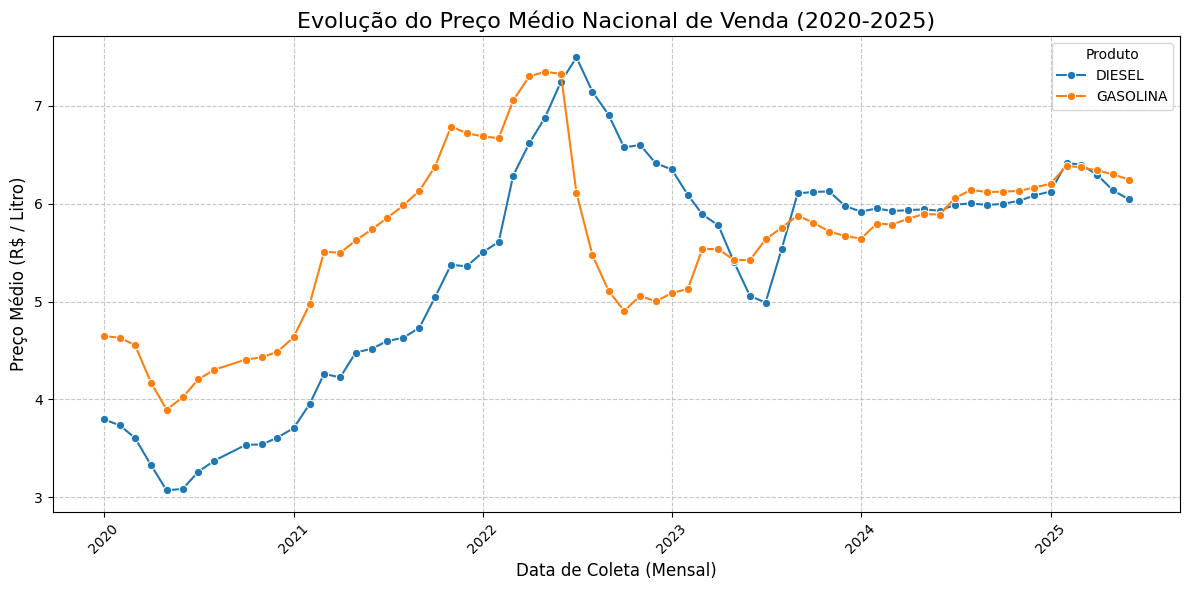

In [23]:
# Importação da biblioteca de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Para gerar um gráfico claro, reagrupamos para ter a média nacional dos preços por mês/produto.
df_plot = anl_tabela.groupby(['data_mensal', 'produto']).agg(
    valor_medio_nacional = ('valor_medio_venda', 'mean')
).reset_index()

# Filtrar para os produtos mais comuns para uma visualização limpa
produtos_interesse = ['GASOLINA', 'DIESEL']
df_plot_final = df_plot[df_plot['produto'].isin(produtos_interesse)]

# --- Geração do Gráfico ---

# Configuração do tamanho da figura
plt.figure(figsize=(12, 6))

# Criação do gráfico de linhas, separando as cores por produto
sns.lineplot(
    data=df_plot_final,
    x='data_mensal',
    y='valor_medio_nacional',
    hue='produto',
    marker='o' # Adiciona um marcador em cada ponto de dados
)

# Adicionar rótulos e título
plt.title('Evolução do Preço Médio Nacional de Venda (2020-2025)', fontsize=16)
plt.xlabel('Data de Coleta (Mensal)', fontsize=12)
plt.ylabel('Preço Médio (R$ / Litro)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Produto')
plt.xticks(rotation=45)
plt.tight_layout() # Ajusta o layout para evitar cortes

# Salvar o gráfico
plt.savefig('evolucao_valor_medio_venda.png')

In [19]:
conexao_banco.close()